# Job Risques Cardio-Vasculaires

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_cardio = pd.read_csv('cardio_train.csv', sep=';')
df_cardio = df_cardio.drop('id', axis=1)

In [4]:
df_cardio.shape

(70000, 12)

In [5]:
df_cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [6]:
df_cardio.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


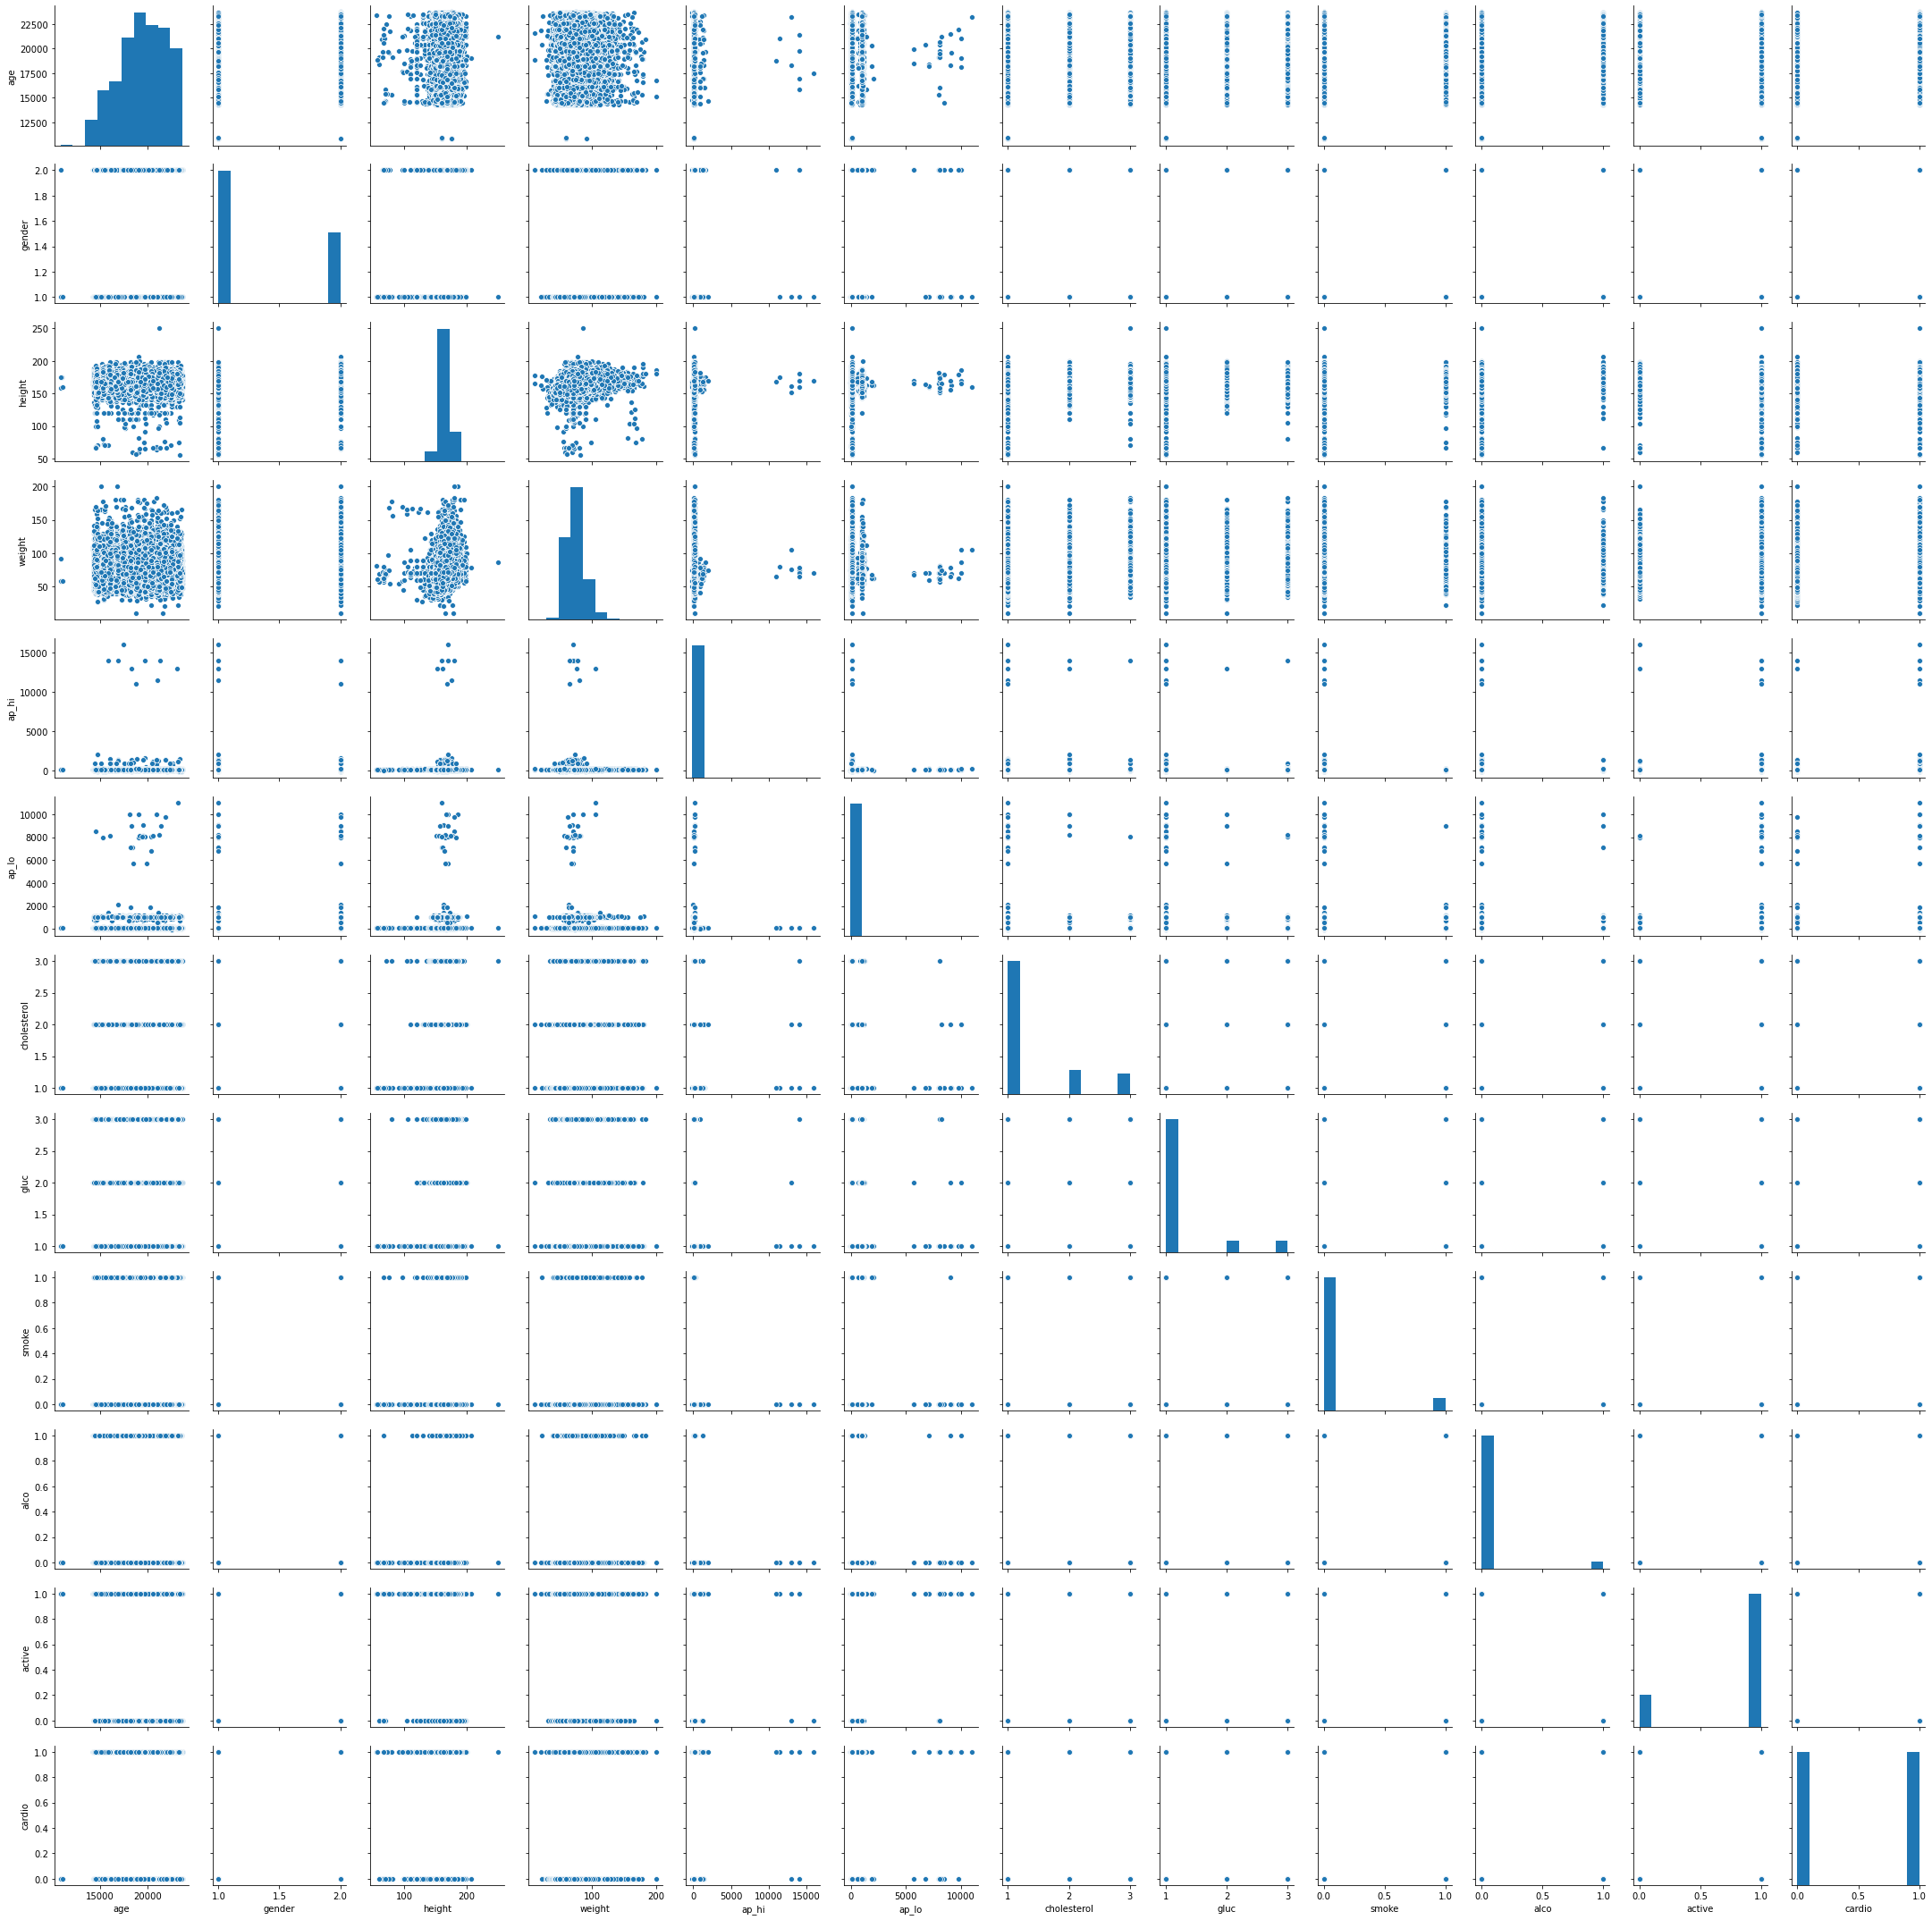

In [7]:
sns.pairplot(df_cardio)

In [8]:
df_cardio.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [9]:
df_cardio.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:ylabel='Frequency'>

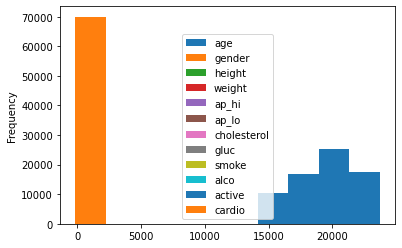

In [10]:
df_cardio.plot.hist()

In [11]:
# Dataset correlations
corrMatrix = df_cardio.corr(method="pearson")
corrMatrix

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
gender,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486
alco,-0.029723,0.170966,0.094419,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330


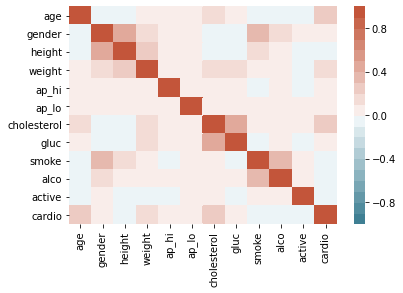

In [12]:
# Correlation matrix heatmap
sns.heatmap(corrMatrix, vmin=-1, vmax=1, cmap=sns.diverging_palette(220, 20, n=20))
plt.show()

In [13]:
df_cardio['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

**Les données semblent équilibrées.**

<AxesSubplot:xlabel='cardio', ylabel='count'>

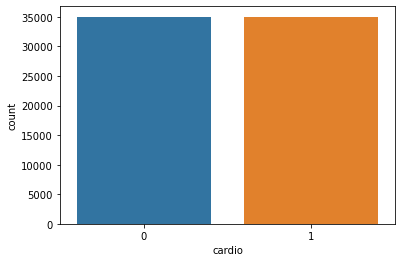

In [14]:
sns.countplot(x='cardio', data=df_cardio)

Text(0.5, 0, 'Genre')

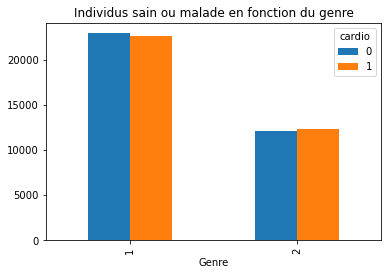

In [16]:
pd.crosstab(df_cardio.gender, df_cardio.cardio).plot(kind='bar')
plt.title('Individus sain ou malade en fonction du genre')
plt.xlabel('Genre')
plt.ylabel('Frequence')

Text(0, 0.5, 'Frequence')

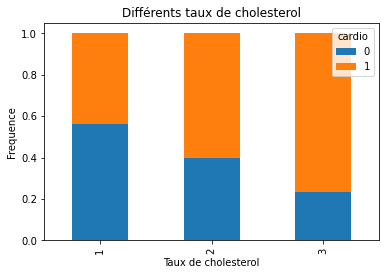

In [22]:
table=pd.crosstab(df_cardio.cholesterol,df_cardio.cardio)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Différents taux de cholesterol')
plt.xlabel('Taux de cholesterol')
plt.ylabel('Proportion')

Text(0, 0.5, 'Frequence')

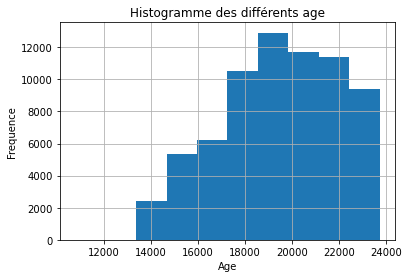

In [24]:
df_cardio.age.hist()
plt.title('Histogramme de l\'age des individus')
plt.xlabel('age')
plt.ylabel('Frequence')

Text(0, 0.5, 'Frequence')

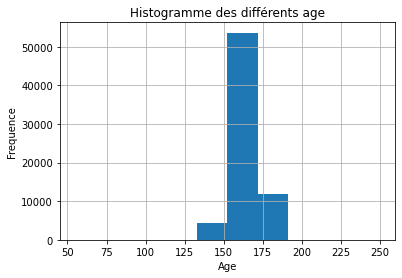

In [25]:
df_cardio.height.hist()
plt.title('Histogramme de la taille des individus')
plt.xlabel('taille')
plt.ylabel('Frequence')

Text(0, 0.5, 'Frequence')

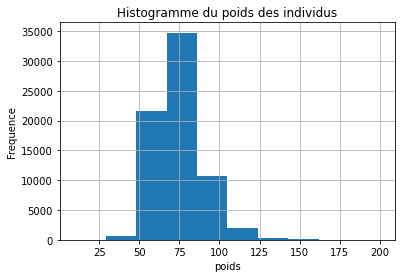

In [27]:
df_cardio.weight.hist()
plt.title('Histogramme du poids des individus')
plt.xlabel('poids')
plt.ylabel('Frequence')

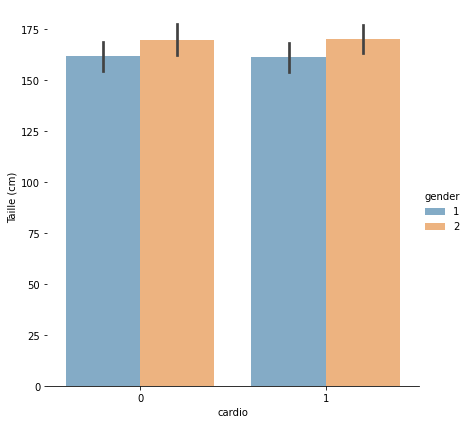

In [59]:
g = sns.catplot(
    data=df_cardio, kind="bar",
    x="cardio", y="height", hue="gender",
    ci="sd", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("cardio", "Taille (cm)")

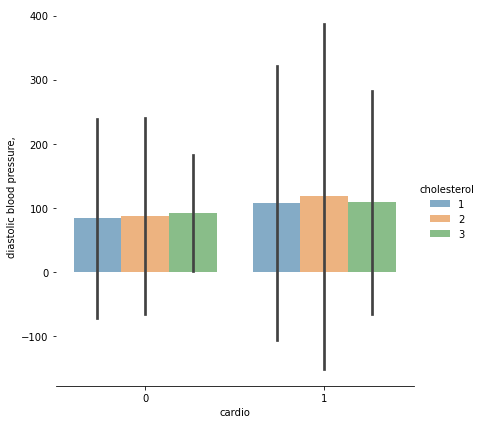

In [60]:
g = sns.catplot(
    data=df_cardio, kind="bar",
    x="cardio", y="ap_lo", hue="cholesterol",
    ci="sd", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("cardio", "diastolic blood pressure,")

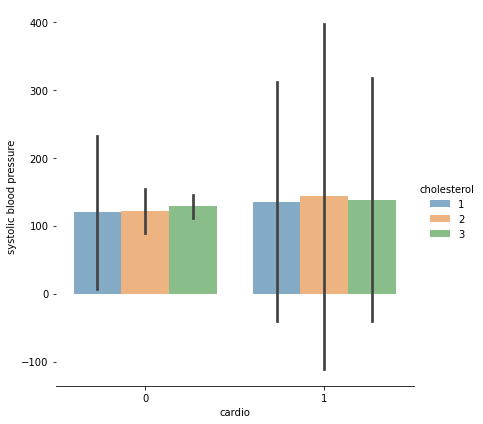

In [66]:
g = sns.catplot(
    data=df_cardio, kind="bar",
    x="cardio", y="ap_hi", hue="cholesterol",
    ci="sd", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("cardio", "systolic blood pressure")

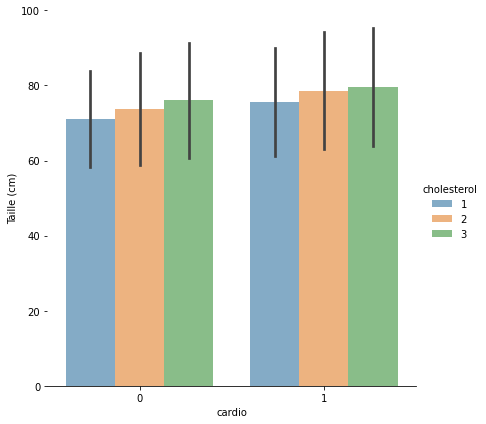

In [67]:
g = sns.catplot(
    data=df_cardio, kind="bar",
    x="cardio", y="weight", hue="cholesterol",
    ci="sd", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("cardio", "Taille (cm)")

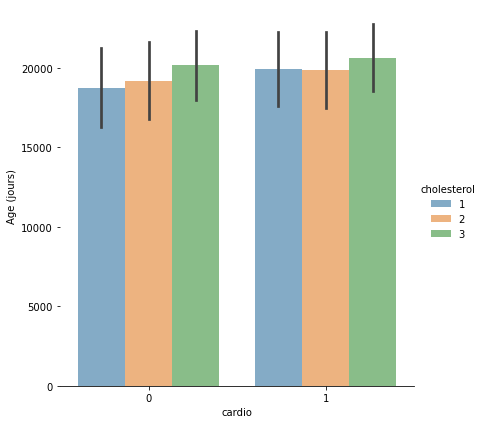

In [69]:
g = sns.catplot(
    data=df_cardio, kind="bar",
    x="cardio", y="age", hue="cholesterol",
    ci="sd", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("cardio", "Age (jours)")

## LogisticRegression with SKLearn

### Univariate

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, roc_curve, roc_auc_score

In [16]:
df_cardio.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [17]:
X = np.array(df_cardio['age']).reshape(-1,1)
y = df_cardio['cardio'].ravel()

### Scaling

In [18]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

In [19]:
logreg = LogisticRegression(C=1.0, solver='lbfgs', multi_class='ovr')

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [21]:
logreg.fit(X_train, y_train)
print('Intercept :',logreg.intercept_,'  ','Coeff',logreg.coef_)

Intercept : [-0.00750754]    Coeff [[0.49935006]]


In [22]:
y_pred = logreg.predict(X_test)
logreg.score(X_test, y_test)

0.5984

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.55      0.58      8716
           1       0.59      0.65      0.62      8784

    accuracy                           0.60     17500
   macro avg       0.60      0.60      0.60     17500
weighted avg       0.60      0.60      0.60     17500



Confusion matrix for Logistic Regression
[[4794 3922]
 [3106 5678]]

Normalized confusion matrix for Logistic Regression
[[0.55002295 0.44997705]
 [0.35359745 0.64640255]]



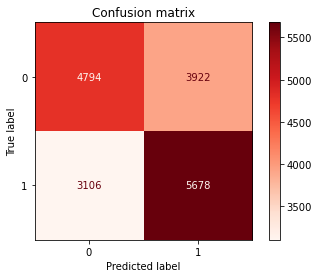

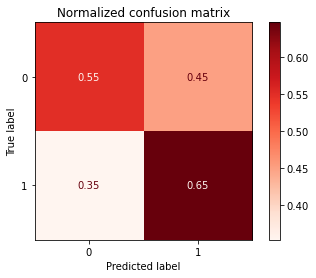

In [24]:
titles_options = [("Confusion matrix", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(logreg, X_test, y_test,
                                 cmap=plt.cm.Reds,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title,'for Logistic Regression')
    print(disp.confusion_matrix)
    print()

plt.show()

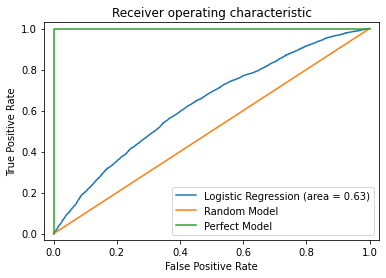

In [25]:
probas = logreg.predict_proba(X_test)[::,1]
logit_roc_auc = roc_auc_score(y_test, probas)
fpr, tpr, thresholds = roc_curve(y_test, probas)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], label='Random Model')
plt.plot([0,0,1,1],[0,1,1,1], label='Perfect Model')
plt.xlim([-0.03, 1.03])
plt.ylim([-0.03, 1.03])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Multivariate

In [26]:
X = np.array(pd.DataFrame(df_cardio, columns=['age', 'weight', 'cholesterol']))
y = np.array(df_cardio['cardio']).ravel()

In [27]:
X = StandardScaler().fit_transform(X)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [29]:
model = LogisticRegression(penalty='l2')

In [30]:
model.fit(X_train, y_train)

LogisticRegression()

In [31]:
print('Intercept :',model.intercept_,'  ','Coeff',model.coef_)

Intercept : [0.01066891]    Coeff [[0.45384148 0.33866411 0.39530322]]


In [32]:
y_pred = model.predict(X_test)

In [33]:
model.score(X_test, y_test)

0.6344

### Classification report

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.66      0.65      8762
           1       0.64      0.60      0.62      8738

    accuracy                           0.63     17500
   macro avg       0.63      0.63      0.63     17500
weighted avg       0.63      0.63      0.63     17500



### Confusion Matrix

Confusion matrix for Logistic Regression
[[5819 2943]
 [3455 5283]]

Normalized confusion matrix for Logistic Regression
[[0.66411778 0.33588222]
 [0.3953994  0.6046006 ]]



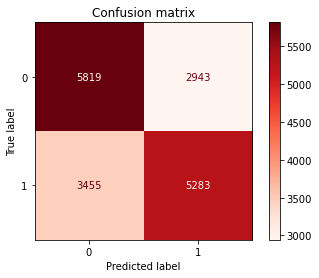

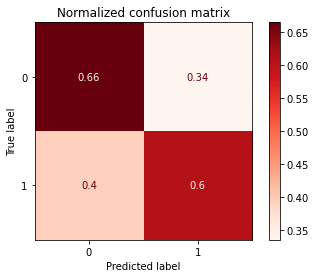

In [35]:
titles_options = [("Confusion matrix", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 cmap=plt.cm.Reds,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title,'for Logistic Regression')
    print(disp.confusion_matrix)
    print()

plt.show()

### ROC Curve

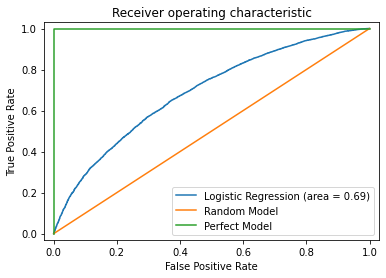

In [36]:
probas = model.predict_proba(X_test)[::,1]
logit_roc_auc = roc_auc_score(y_test, probas)
fpr, tpr, thresholds = roc_curve(y_test, probas)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], label='Random Model')
plt.plot([0,0,1,1],[0,1,1,1], label='Perfect Model')
plt.xlim([-0.03, 1.03])
plt.ylim([-0.03, 1.03])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Logistic Regression from Scratch

In [37]:
from LR import LogisticR

In [38]:
lr = LogisticR()
lr.fit(X_train, y_train)

In [39]:
y_pred_bis = lr.predict(X_test)

In [40]:
confusion_matrix(y_test, y_pred_bis)

array([[5861, 2901],
       [3494, 5244]], dtype=int64)

### Classification report

In [41]:
print(classification_report(y_test, y_pred_bis))

              precision    recall  f1-score   support

           0       0.63      0.67      0.65      8762
           1       0.64      0.60      0.62      8738

    accuracy                           0.63     17500
   macro avg       0.64      0.63      0.63     17500
weighted avg       0.64      0.63      0.63     17500



### Courbe Roc

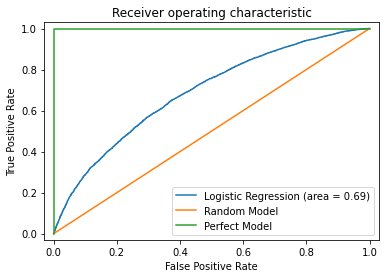

In [42]:
predict_probas = lr.predict_prob(X_test)
logit_roc_auc = roc_auc_score(y_test, predict_probas)
fpr, tpr, thresholds = roc_curve(y_test, predict_probas)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], label='Random Model')
plt.plot([0,0,1,1],[0,1,1,1], label='Perfect Model')
plt.xlim([-0.03, 1.03])
plt.ylim([-0.03, 1.03])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#### Prédire si Arthur 53 ans, fumeur, sportif, 175 cm, 85 kg, avec un taux de cholestérol au dessus de la normal et un taux de glucose normal, une tension artérielle systolique dans la moyenne et une pression sanguine diastolique correspondant à la moyenne du 3e quartile (50%-75%) du jeu de données, est un sujet à risques cardio-vasculaires.
X = [53, 2, 175, 85, 130, 85, 2, 1, 1, 0, 1]

y = ?

In [43]:
x = np.array([53, 85, 2]).reshape(1, -1)
x = StandardScaler().fit_transform(x)
y = lr.predict(x)
if y==1:
    print('Arthur est un sujet à risques cardio-vasculaires.')
else:
    print('Arthur n\'est pas un sujet à risques cardio-vasculaires.')

Arthur est un sujet à risques cardio-vasculaires.
